# 3.2 Analyze Product Data
This notebook analyzes the cleaned product data in preparation for modeling. The ultimate goal is to match cleaned articles to the products based on their cleaned product data.

In [1]:
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

#### Load dataset and create a new dataframe

In [2]:
# Load dataset
with open('intermediate_data/Products_List_Clean.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Create DataFrame
df = pd.DataFrame(data.get('categories', data))

#### Extract product count for all product categories

In [3]:

# Extract numeric item count from the "name" field
pattern = re.compile(r'(\d{1,3}(?:,\d{3})*|\d+)\s*Items?', re.IGNORECASE)
df['items'] = df['name'].str.extract(pattern)[0].str.replace(',', '', regex=False)
df['items'] = pd.to_numeric(df['items'], errors='coerce').fillna(0).astype(int)

# Clean for better display
df['clean_name'] = df['name'].str.replace(r'\d{1,3}(?:,\d{3})*|\d+\s*Items?', '', regex=True).str.strip()

#### Filter categories with no products

In [4]:
df = df[df['items'] > 0]

#### Pre-calculate values

In [5]:
top10 = df.nlargest(10, 'items')
category_counts = df['category'].value_counts()
total_items = df['items'].sum()

#### Bar Chart (Top 10 by categories by items)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (8,) and arg 1 with shape (0,).

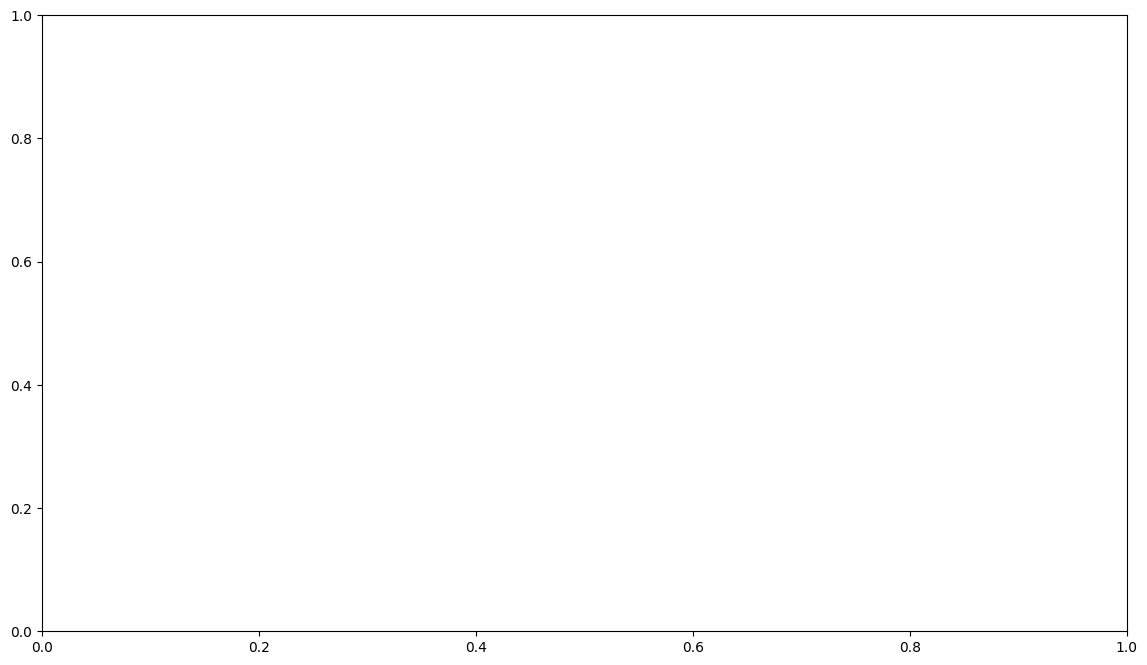

In [8]:
plt.figure(figsize=(14, 8))
bars = plt.bar(range(10), top10['items'], color=plt.cm.tab10(range(10)))
plt.title('Top 10 Categories by Items', fontsize=16, fontweight='bold')
plt.xticks(
    range(10),
    [n[:20] + '...' if len(n) > 20 else n for n in top10['clean_name']],
    rotation=45, ha='right'
)

# Add value labels above bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50,
             f'{int(bar.get_height()):,}', ha='center', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

#### Pie Chart (Category Distribution)

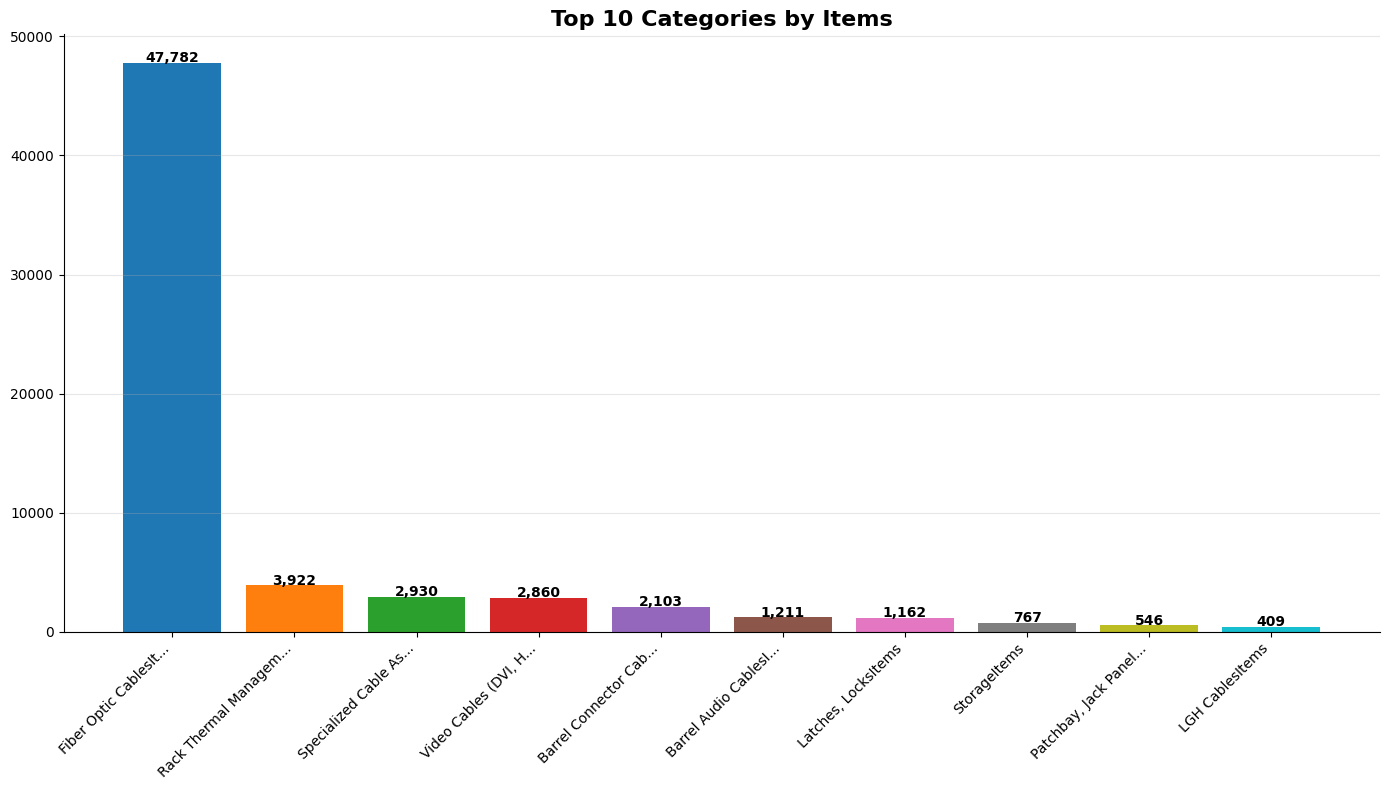

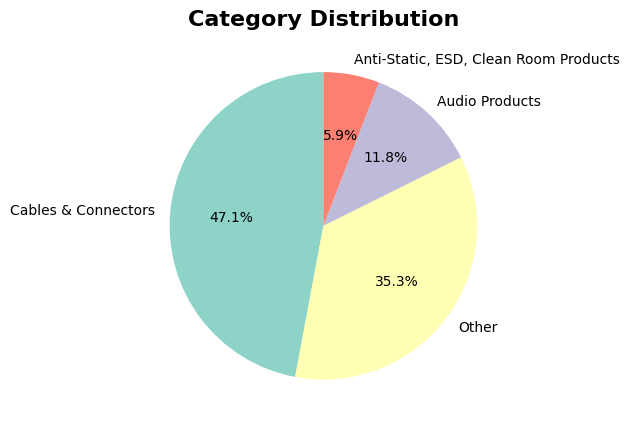

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(category_counts.values,
        labels=category_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors[:len(category_counts)])
plt.title('Category Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


## Next Step
After you have completed your product data analysis here, run the next step in the workflow [04-ModelRec.ipynb](./04-ModelRec.ipynb) or go back to [00-Workflow.ipynb](./00-Workflow.ipynb).

---

**Authors:**
[Salah Mohamoud](mailto:salah.mohamoud.dev@gmail.com),
[Sai Keertana Lakku](mailto:saikeertana005@gmail.com),
[Zhen Zhuang](mailto:zhuangzhen17cs@gmail.com),
[Nick Capaldini](mailto:nick.capaldini@ridethenextwave.com), Ride The Next Wave, May 19, 2025

---